In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 15.6MB/s 
     |████████████████████████████████| 12.8MB 245kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 296kB 18.2MB/s 


In [2]:
!wget https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1 -O erm.zip

--2021-03-16 08:30:06--  https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qrdswgzv63o3opg/datasetCorregido.zip [following]
--2021-03-16 08:30:06--  https://www.dropbox.com/s/dl/qrdswgzv63o3opg/datasetCorregido.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc191f7ea92f8b8f296e2e324245.dl.dropboxusercontent.com/cd/0/get/BKyzAGmqXromhDcX9tYIODUhhoI5VmTeVhLnqQfggnrDmy2ubRS0yabEh_TSdCkKvRHfhY195xnn0XFRWbE-LWfU3CKa6kx5npsSR8k9gdWBnh51xoKVREMbG8er99QpTdmJmL-4YECqEBjxqVc3XxE7/file?dl=1# [following]
--2021-03-16 08:30:06--  https://uc191f7ea92f8b8f296e2e324245.dl.dropboxusercontent.com/cd/0/get/BKyzAGmqXromhDcX9tYIODUhhoI5VmTeVhLnqQfggnrDmy2ubRS0yabEh_TSdCkK

In [3]:
!unzip erm.zip

Archive:  erm.zip
   creating: datasetCorregido/
   creating: datasetCorregido/train/
   creating: datasetCorregido/train/no/
  inflating: datasetCorregido/train/no/anonymized_482127.jpg  
  inflating: datasetCorregido/train/no/anonymized_174749.jpg  
  inflating: datasetCorregido/train/no/anonymized_734047.jpg  
  inflating: datasetCorregido/train/no/anonymized_581767.jpg  
  inflating: datasetCorregido/train/no/anonymized_1400777.jpg  
  inflating: datasetCorregido/train/no/anonymized_347431.jpg  
  inflating: datasetCorregido/train/no/anonymized_626433.jpg  
  inflating: datasetCorregido/train/no/anonymized_1372303.jpg  
  inflating: datasetCorregido/train/no/anonymized_1324599.jpg  
  inflating: datasetCorregido/train/no/anonymized_196853.jpg  
  inflating: datasetCorregido/train/no/anonymized_687000.jpg  
  inflating: datasetCorregido/train/no/anonymized_504041.jpg  
  inflating: datasetCorregido/train/no/anonymized_1414333.jpg  
  inflating: datasetCorregido/train/no/anonymized_3

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=384):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=360,max_warp=0,max_zoom=1.1,
                      max_lighting=0.1,p_lighting=0.5), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=8)

In [8]:
from fastai.vision.all import *
import timm
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18')
]

In [9]:
modelo=timm.models.vision_transformer.vit_deit_base_patch16_384(num_classes=2,pretrained=True)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_384-8de9b5d1.pth" to /root/.cache/torch/hub/checkpoints/deit_base_patch16_384-8de9b5d1.pth


## Ranger

In [10]:
opt_func = partial(ranger, beta=0.99, eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=3.311311274956097e-06)

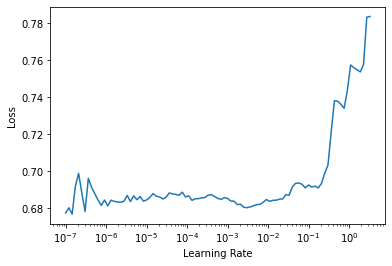

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.684831,0.683515,0.555046,0.565000,0.658892,02:52
1,0.677060,0.692381,0.559633,0.682119,0.300292,02:51


Better model found at epoch 0 with valid_loss value: 0.6835147738456726.


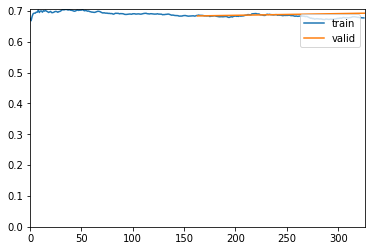

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.684173,0.684332,0.547401,0.577049,0.513120,02:51
1,0.676428,0.680179,0.558104,0.575000,0.603499,02:51
2,0.673627,0.677861,0.581040,0.625455,0.501458,02:51
3,0.661124,0.687703,0.571865,0.693252,0.329446,02:51
4,0.646721,0.704985,0.558104,0.750000,0.236152,02:51
5,0.628568,0.658862,0.613150,0.671756,0.513120,02:51
6,0.624056,0.659567,0.628440,0.717391,0.481050,02:51
7,0.607430,0.665368,0.617737,0.738462,0.419825,02:51
8,0.588616,0.638483,0.642202,0.717131,0.524781,02:51
9,0.586402,0.634782,0.642202,0.720648,0.518950,02:51


Better model found at epoch 0 with valid_loss value: 0.6843324899673462.


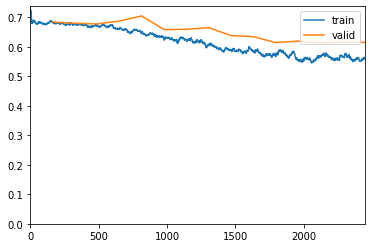

Better model found at epoch 1 with valid_loss value: 0.6801789999008179.
Better model found at epoch 2 with valid_loss value: 0.6778606176376343.
Better model found at epoch 5 with valid_loss value: 0.6588620543479919.
Better model found at epoch 8 with valid_loss value: 0.6384826302528381.
Better model found at epoch 9 with valid_loss value: 0.6347823143005371.
Better model found at epoch 10 with valid_loss value: 0.6147070527076721.
Better model found at epoch 12 with valid_loss value: 0.6135315299034119.


In [ ]:
learn.fine_tune(15,freeze_epochs=2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

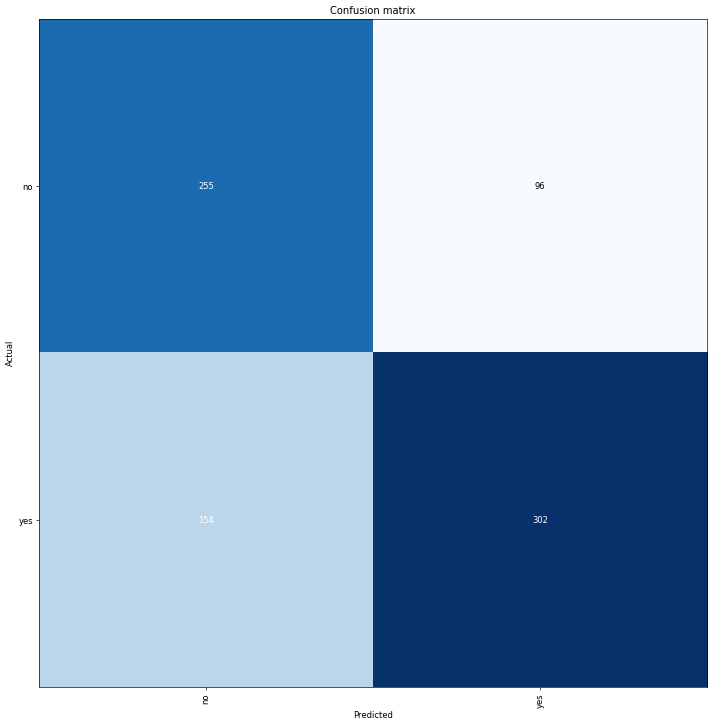

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6902106404304504.


(#4) [0.5846189856529236,0.6902106404304504,0.7587939698492462,0.6622807017543859]

## Faltten

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.721014,0.708664,0.475535,0.000000,0.000000,02:51
1,0.698371,0.691893,0.524465,0.524465,1.000000,02:51


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 0 with valid_loss value: 0.7086642980575562.


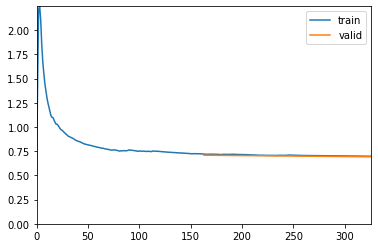

Better model found at epoch 1 with valid_loss value: 0.6918931603431702.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=0.0006918309954926372)

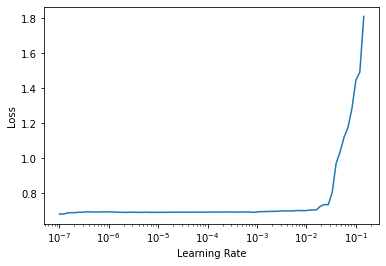

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.803759,0.692230,0.524465,0.524465,1.000000,02:53
1,0.709450,0.791581,0.475535,0.000000,0.000000,02:53
2,0.703684,0.765045,0.475535,0.000000,0.000000,02:52
3,0.692944,0.703828,0.524465,0.524465,1.000000,02:52


Better model found at epoch 0 with valid_loss value: 0.6922302842140198.


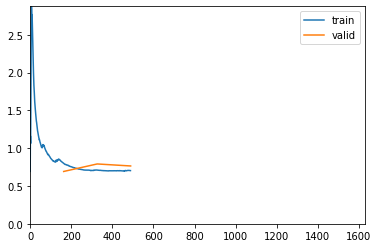

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No improvement since epoch 0: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

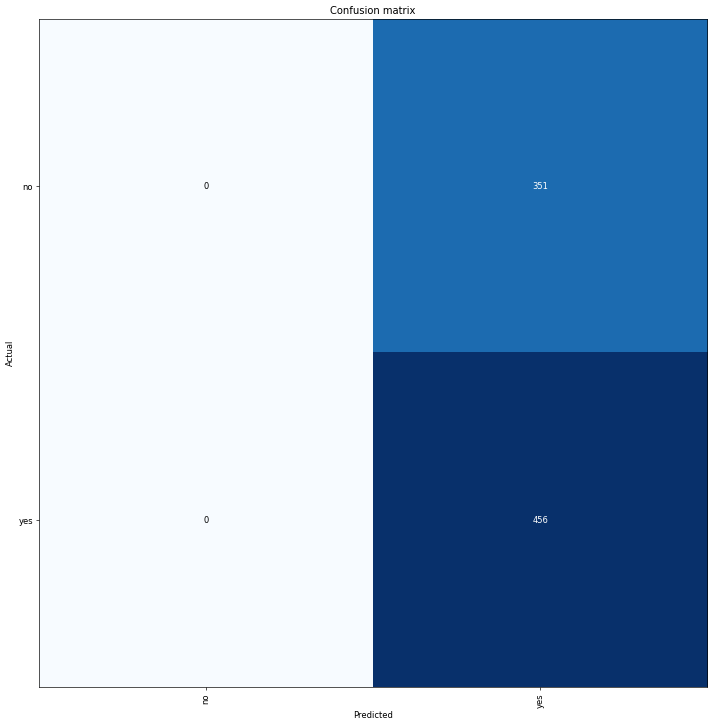

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6901221871376038,0.565055787563324,0.5650557620817844,1.0]

## LabelSmoothing

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=0.0691830962896347)

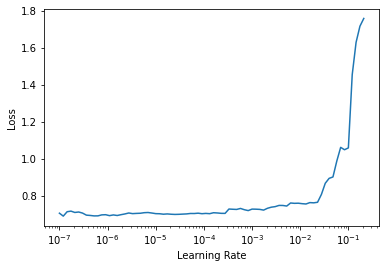

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.668347,0.612688,0.691131,0.704225,0.628931,10:16
1,0.648469,0.687901,0.562691,0.921053,0.110063,10:16


Better model found at epoch 0 with valid_loss value: 0.6126876473426819.


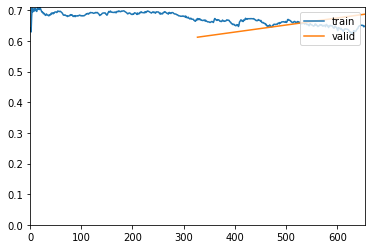

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.577965,0.606361,0.678899,0.632353,0.811321,10:16
1,0.572545,0.575159,0.704893,0.684366,0.729560,10:16
2,0.563212,0.583070,0.738532,0.759717,0.676101,10:16
3,0.566373,0.596423,0.714067,0.810427,0.537736,10:16
4,0.559351,0.585473,0.726300,0.687332,0.801887,10:16


Better model found at epoch 0 with valid_loss value: 0.6063610315322876.


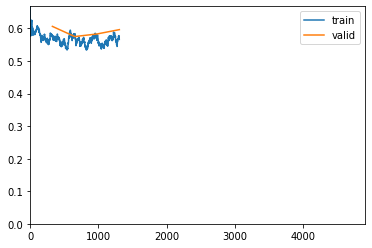

Better model found at epoch 1 with valid_loss value: 0.5751590728759766.
No improvement since epoch 1: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

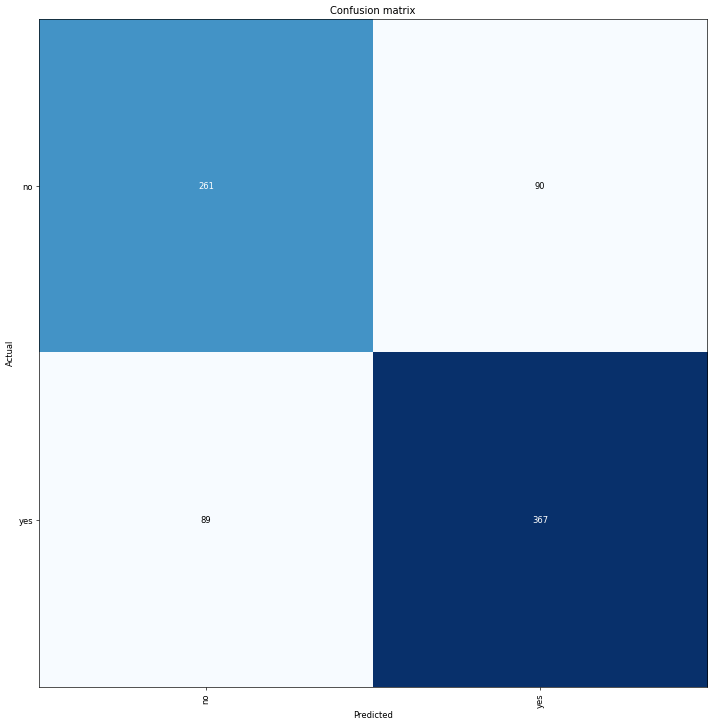

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7781908512115479.


(#4) [0.5334755778312683,0.7781908512115479,0.8030634573304157,0.8048245614035088]

## MixUp

In [11]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.584719,0.580947,0.688073,0.631944,0.858491,10:25
1,0.676442,0.645324,0.669725,0.762887,0.465409,10:25


Better model found at epoch 0 with valid_loss value: 0.5809465050697327.


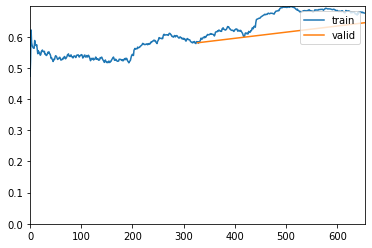

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.558581,0.531723,0.747706,0.735385,0.751572,10:25
1,0.527928,0.536606,0.732416,0.699164,0.789308,10:25
2,0.546422,0.537364,0.747706,0.790875,0.654088,10:18
3,0.569101,0.597153,0.685015,0.636585,0.820755,10:16


Better model found at epoch 0 with valid_loss value: 0.5317232012748718.


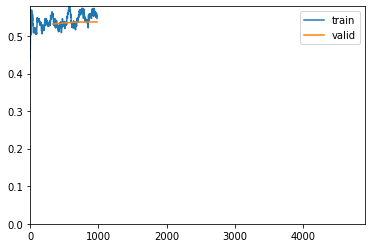

No improvement since epoch 0: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

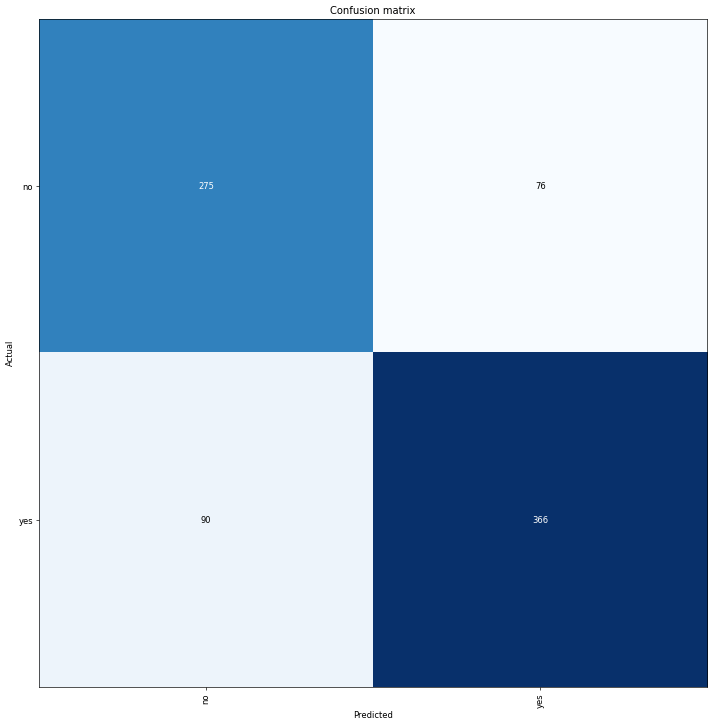

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7942999005317688.


(#4) [0.4691796898841858,0.7942999005317688,0.8280542986425339,0.8026315789473685]

## Ranger + Flat cosin Anneal

In [24]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.676958,0.687800,0.555046,0.574713,0.583090,06:17
1,0.652928,0.681691,0.564220,0.590062,0.553936,06:17


Better model found at epoch 0 with valid_loss value: 0.6878001093864441.


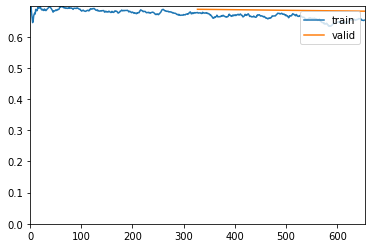

Better model found at epoch 1 with valid_loss value: 0.6816911697387695.


In [25]:
learn.fit_flat_cos(2,lr=1e-3)

In [26]:
learn.unfreeze()

SuggestedLRs(lr_min=2.0892961401841602e-06, lr_steep=1.0964781722577754e-06)

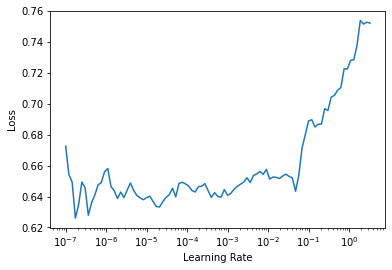

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.644725,0.686624,0.561162,0.611111,0.448980,06:17
1,0.641161,0.679935,0.559633,0.593857,0.507289,06:17
2,0.646949,0.681319,0.568807,0.615094,0.475219,06:17
3,0.633999,0.676781,0.571865,0.612100,0.501458,06:17
4,0.642132,0.678231,0.567278,0.617188,0.460641,06:17
5,0.622912,0.671546,0.573394,0.605263,0.536443,06:17
6,0.627865,0.670961,0.582569,0.620690,0.524781,06:17
7,0.627112,0.669628,0.582569,0.626812,0.504373,06:17
8,0.620971,0.666241,0.590214,0.623762,0.551020,06:17
9,0.627128,0.664763,0.593272,0.622222,0.571429,06:17


Better model found at epoch 0 with valid_loss value: 0.68662428855896.


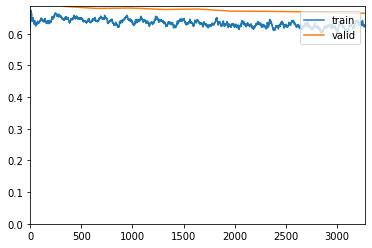

Better model found at epoch 1 with valid_loss value: 0.6799353957176208.
Better model found at epoch 3 with valid_loss value: 0.6767814755439758.
Better model found at epoch 5 with valid_loss value: 0.6715456247329712.
Better model found at epoch 6 with valid_loss value: 0.670961320400238.
Better model found at epoch 7 with valid_loss value: 0.6696279644966125.
Better model found at epoch 8 with valid_loss value: 0.6662412285804749.
Better model found at epoch 9 with valid_loss value: 0.6647629141807556.


In [28]:
learn.fit_flat_cos(10,lr=1e-4)

In [29]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [30]:
learn.dls = dlsTest

In [31]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.627013623714447.


(#4) [0.6398157477378845,0.627013623714447,0.7055702917771883,0.5833333333333334]

## Ranger+Flar Cossin Anneal+LabelSmoothing

In [32]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.626351,0.657053,0.607034,0.628743,0.612245,06:17
1,0.616704,0.654794,0.631498,0.694656,0.530612,06:17


Better model found at epoch 0 with valid_loss value: 0.6570529341697693.


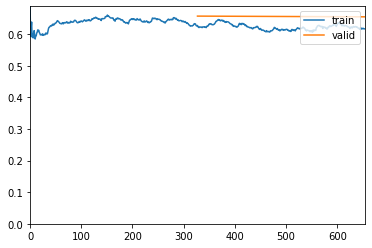

Better model found at epoch 1 with valid_loss value: 0.6547941565513611.


In [33]:
learn.fit_flat_cos(2,lr=1e-3)

In [34]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=6.309573450380412e-07)

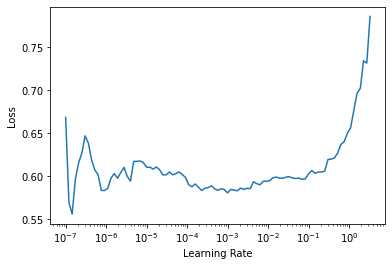

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.609439,0.645514,0.633027,0.665595,0.603499,06:17
1,0.596835,0.648189,0.634557,0.685714,0.559767,06:17
2,0.598420,0.643157,0.643731,0.682119,0.600583,06:17
3,0.596519,0.644364,0.642202,0.695341,0.565598,06:17
4,0.594551,0.636915,0.640673,0.671975,0.615160,06:17
5,0.582296,0.638671,0.648318,0.699647,0.577259,06:17
6,0.582879,0.631084,0.649847,0.671687,0.650146,06:17
7,0.585053,0.629529,0.648318,0.673846,0.638484,06:17
8,0.596764,0.627244,0.651376,0.670623,0.658892,06:17
9,0.579645,0.627169,0.657492,0.656992,0.725948,06:17


Better model found at epoch 0 with valid_loss value: 0.6455139517784119.


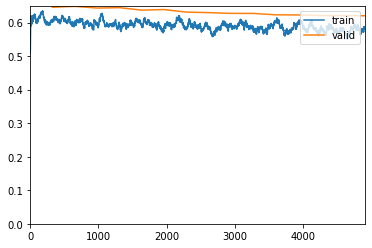

Better model found at epoch 2 with valid_loss value: 0.6431571841239929.
Better model found at epoch 4 with valid_loss value: 0.6369145512580872.
Better model found at epoch 6 with valid_loss value: 0.6310838460922241.
Better model found at epoch 7 with valid_loss value: 0.6295294165611267.
Better model found at epoch 8 with valid_loss value: 0.6272435784339905.
Better model found at epoch 9 with valid_loss value: 0.6271691918373108.
Better model found at epoch 10 with valid_loss value: 0.6229670643806458.
Better model found at epoch 11 with valid_loss value: 0.6226339340209961.
Better model found at epoch 12 with valid_loss value: 0.6207488775253296.
Better model found at epoch 13 with valid_loss value: 0.6202856302261353.
Better model found at epoch 14 with valid_loss value: 0.62016761302948.


In [36]:
learn.fit_flat_cos(15,lr=1e-4)

In [37]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [38]:
learn.dls = dlsTest

In [39]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7100371718406677.


(#4) [0.589388370513916,0.7100371718406677,0.7775,0.6820175438596491]

## Ranger +Flat + Label + MixUp

In [40]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.617390,0.638650,0.669725,0.809756,0.483965,06:18
1,0.603427,0.610539,0.680428,0.721854,0.635569,06:18


Better model found at epoch 0 with valid_loss value: 0.6386500597000122.


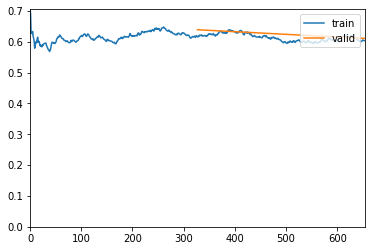

Better model found at epoch 1 with valid_loss value: 0.6105393171310425.


In [41]:
learn.fit_flat_cos(2,lr=1e-3)

In [42]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.598763,0.611503,0.675841,0.731449,0.603499,06:18
1,0.598344,0.606945,0.675841,0.713355,0.638484,06:18
2,0.612508,0.608715,0.680428,0.734266,0.612245,06:18
3,0.591998,0.602903,0.688073,0.717868,0.667638,06:18
4,0.613816,0.610015,0.681957,0.752809,0.586006,06:18
5,0.591842,0.601255,0.691131,0.722397,0.667638,06:18
6,0.598085,0.603246,0.683486,0.732877,0.623907,06:18
7,0.588371,0.599434,0.692661,0.726115,0.664723,06:18
8,0.584069,0.606923,0.686544,0.753676,0.597668,06:18
9,0.592889,0.601353,0.678899,0.726962,0.620991,06:18


Better model found at epoch 0 with valid_loss value: 0.6115033626556396.


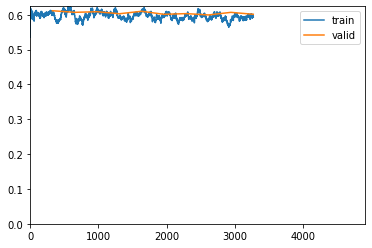

Better model found at epoch 1 with valid_loss value: 0.6069454550743103.
Better model found at epoch 3 with valid_loss value: 0.6029025912284851.
Better model found at epoch 5 with valid_loss value: 0.6012553572654724.
Better model found at epoch 7 with valid_loss value: 0.5994338989257812.
No improvement since epoch 7: early stopping


In [43]:
learn.fit_flat_cos(15,lr=1e-4)

In [44]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

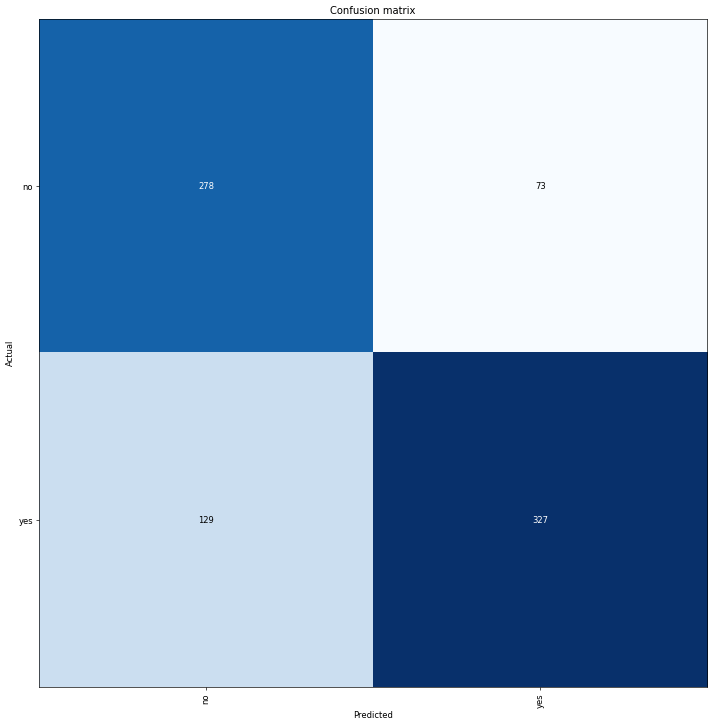

In [45]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [46]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7496902346611023.


(#4) [0.563156247138977,0.7496902346611023,0.8175,0.7171052631578947]

## Ranger + Flat + MixUp

In [47]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [48]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.580646,0.564123,0.701835,0.704420,0.743440,06:18
1,0.570819,0.583723,0.681957,0.766798,0.565598,06:18


Better model found at epoch 0 with valid_loss value: 0.5641229748725891.


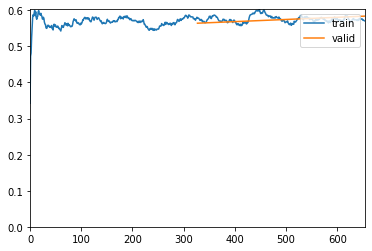

In [49]:
learn.fit_flat_cos(2,lr=1e-3)

In [50]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.576563,0.565390,0.692661,0.730519,0.655977,06:18
1,0.555051,0.565347,0.695719,0.732258,0.661808,06:18
2,0.572166,0.564867,0.697248,0.733119,0.664723,06:18
3,0.575404,0.566881,0.694190,0.745704,0.632653,06:18
4,0.584795,0.561243,0.692661,0.719136,0.679300,06:18
5,0.548920,0.561294,0.703364,0.739550,0.670554,06:18
6,0.564461,0.559623,0.697248,0.730159,0.670554,06:18
7,0.545303,0.557818,0.704893,0.720588,0.714286,06:18
8,0.539225,0.557010,0.712538,0.719547,0.740525,06:18
9,0.547978,0.559399,0.700306,0.742574,0.655977,06:18


Better model found at epoch 0 with valid_loss value: 0.56538987159729.


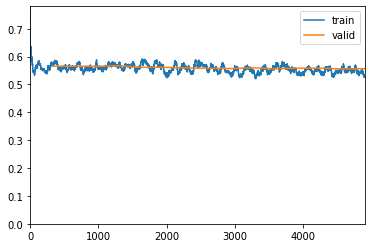

Better model found at epoch 1 with valid_loss value: 0.5653472542762756.
Better model found at epoch 2 with valid_loss value: 0.5648674368858337.
Better model found at epoch 4 with valid_loss value: 0.5612428784370422.
Better model found at epoch 6 with valid_loss value: 0.5596230626106262.
Better model found at epoch 7 with valid_loss value: 0.5578184127807617.
Better model found at epoch 8 with valid_loss value: 0.5570096969604492.
Better model found at epoch 10 with valid_loss value: 0.5563041567802429.
Better model found at epoch 13 with valid_loss value: 0.5556098222732544.


In [51]:
learn.fit_flat_cos(15,lr=1e-4)

In [52]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [53]:
learn.dls = dlsTest

In [54]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7583643198013306.


(#4) [0.5001970529556274,0.7583643198013306,0.8175182481751825,0.7368421052631579]

## Ranger + MixUp

In [55]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [56]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.544785,0.559781,0.703364,0.750842,0.650146,06:18
1,0.546054,0.556802,0.703364,0.747508,0.655977,06:18


Better model found at epoch 0 with valid_loss value: 0.5597813129425049.


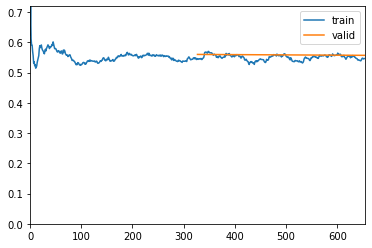

Better model found at epoch 1 with valid_loss value: 0.5568017363548279.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.561752,0.555978,0.709480,0.749186,0.670554,06:18
1,0.542927,0.556504,0.707951,0.750000,0.664723,06:18
2,0.550446,0.558268,0.704893,0.751678,0.653061,06:18
3,0.543526,0.557078,0.703364,0.749164,0.653061,06:18


Better model found at epoch 0 with valid_loss value: 0.5559778213500977.


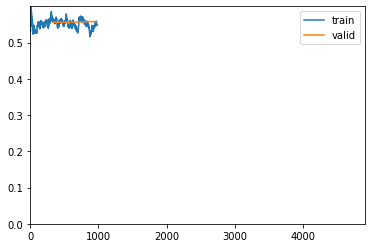

No improvement since epoch 0: early stopping


In [57]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [58]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [59]:
learn.dls = dlsTest

In [60]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7571251392364502.


(#4) [0.5030679106712341,0.7571251392364502,0.8299492385786802,0.7171052631578947]

## Faltten + MixUp

In [61]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.699296,0.696821,0.524465,0.524465,1.000000,06:13
1,0.694025,0.692885,0.524465,0.524465,1.000000,06:13


Better model found at epoch 0 with valid_loss value: 0.6968209147453308.


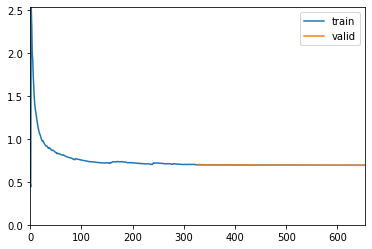

Better model found at epoch 1 with valid_loss value: 0.692885160446167.


In [62]:
learn.fit_flat_cos(2,lr=1e-3)

In [63]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.694105,0.693793,0.475535,0.000000,0.000000,06:13
1,0.693204,0.692610,0.524465,0.524465,1.000000,06:13
2,0.693829,0.692785,0.524465,0.524465,1.000000,06:13
3,0.693559,0.693000,0.509174,0.519097,0.871720,06:13
4,0.693363,0.693497,0.475535,0.000000,0.000000,06:13


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 0 with valid_loss value: 0.6937929391860962.


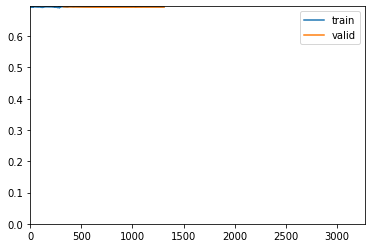

Better model found at epoch 1 with valid_loss value: 0.6926095485687256.
No improvement since epoch 1: early stopping


In [64]:
learn.fit_flat_cos(10,lr=1e-4)

In [65]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [66]:
learn.dls = dlsTest

In [67]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6917769908905029,0.565055787563324,0.5650557620817844,1.0]

## Ranger + Label

In [68]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [69]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693474,0.692670,0.524465,0.524465,1.000000,06:14
1,0.693331,0.692678,0.524465,0.524465,1.000000,06:15


Better model found at epoch 0 with valid_loss value: 0.692669689655304.


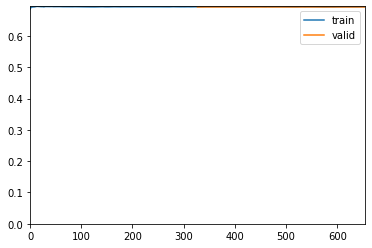

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692907,0.692671,0.524465,0.524465,1.000000,06:15
1,0.693478,0.692673,0.524465,0.524465,1.000000,06:14
2,0.693436,0.692677,0.524465,0.524465,1.000000,06:14
3,0.693130,0.692684,0.524465,0.524465,1.000000,06:14


Better model found at epoch 0 with valid_loss value: 0.6926711201667786.


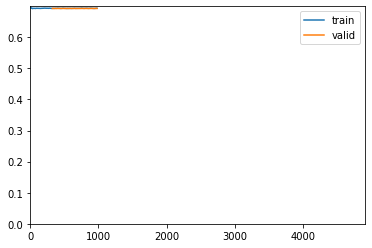

No improvement since epoch 0: early stopping


In [70]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [71]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [72]:
learn.dls = dlsTest

In [73]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6919282078742981,0.565055787563324,0.5650557620817844,1.0]

## Faltten + Label

In [74]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.697055,0.693612,0.475535,0.000000,0.000000,06:12
1,0.693396,0.693018,0.524465,0.524465,1.000000,06:12


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 0 with valid_loss value: 0.6936115026473999.


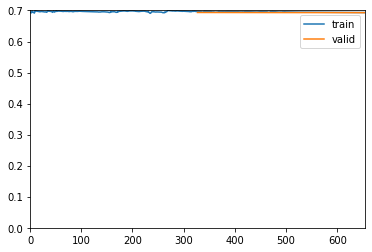

Better model found at epoch 1 with valid_loss value: 0.6930181980133057.


In [75]:
learn.fit_flat_cos(2,lr=1e-3)

In [76]:
learn.unfreeze()

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=0.019054606556892395)

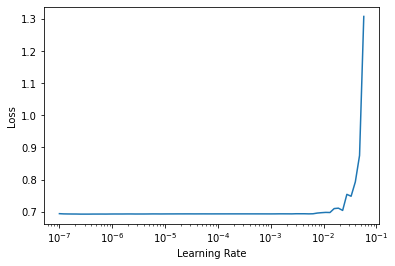

In [77]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693341,0.693246,0.475535,0.000000,0.000000,06:12
1,0.693218,0.693068,0.539755,0.535473,0.924198,06:11
2,0.693339,0.693087,0.525994,0.525502,0.991254,06:12
3,0.693319,0.693106,0.515290,0.547445,0.437318,06:12
4,0.693102,0.692703,0.524465,0.524540,0.997085,06:12
5,0.693475,0.692676,0.524465,0.524768,0.988338,06:12
6,0.693169,0.693547,0.475535,0.000000,0.000000,06:12
7,0.693064,0.693161,0.478593,0.517241,0.087464,06:12
8,0.693126,0.693028,0.518349,0.562500,0.367347,06:12


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 0 with valid_loss value: 0.693246066570282.


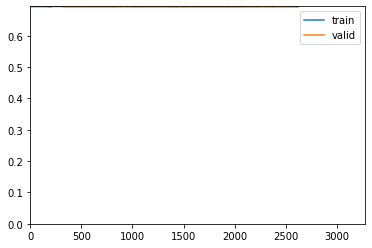

Better model found at epoch 1 with valid_loss value: 0.693067729473114.
Better model found at epoch 4 with valid_loss value: 0.692703366279602.
Better model found at epoch 5 with valid_loss value: 0.6926756501197815.
No improvement since epoch 5: early stopping


In [78]:
learn.fit_flat_cos(10,lr=1e-4)

In [79]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [80]:
learn.dls = dlsTest

In [81]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5662949085235596.


(#4) [0.6919724345207214,0.5662949085235596,0.5660847880299252,0.9956140350877193]

## Label + MixUp

In [12]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.689762,0.675841,0.622324,0.808696,0.292453,06:08
1,0.681066,0.667502,0.573394,0.538462,0.858491,06:35


Better model found at epoch 0 with valid_loss value: 0.6758408546447754.


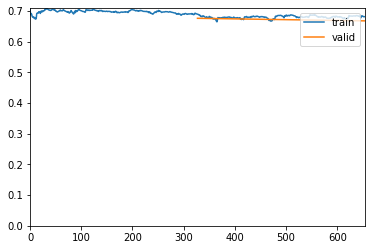

Better model found at epoch 1 with valid_loss value: 0.6675022840499878.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.631335,0.596688,0.706422,0.668449,0.786164,06:35
1,0.620864,0.631692,0.666667,0.602041,0.927673,06:35
2,0.611960,0.616906,0.652905,0.598698,0.867925,06:33
3,0.615282,0.596330,0.692661,0.632054,0.880503,06:34
4,0.606496,0.672623,0.591743,0.546448,0.943396,06:35
5,0.593026,0.585375,0.704893,0.790698,0.534591,06:35
6,0.583020,0.577469,0.720183,0.701493,0.738994,06:34
7,0.558167,0.655327,0.651376,0.587891,0.946541,06:35
8,0.518645,0.597802,0.724771,0.688525,0.792453,06:34
9,0.537294,0.577732,0.743119,0.702703,0.817610,06:35


Better model found at epoch 0 with valid_loss value: 0.5966877937316895.


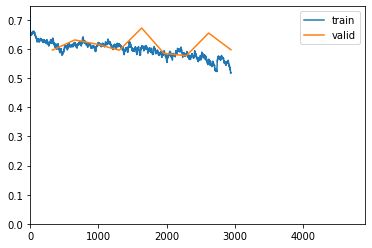

Better model found at epoch 3 with valid_loss value: 0.5963302850723267.
Better model found at epoch 5 with valid_loss value: 0.5853753089904785.
Better model found at epoch 6 with valid_loss value: 0.5774693489074707.
No improvement since epoch 6: early stopping


In [13]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [14]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [15]:
learn.dls = dlsTest

In [16]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7534076571464539.


(#4) [0.5535789132118225,0.7534076571464539,0.7927107061503417,0.7631578947368421]